# Setup

In [1]:
import pandas as pd 
import scipy.stats as stats

# We also want to plot graphs and histograms
# using matplotlib
import matplotlib.pyplot as plt

In [2]:
dataConditionA = pd.read_csv('conditionA.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataConditionA["condition"] = "Arrow"

In [3]:
dataConditionB = pd.read_csv('conditionB.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataConditionB["condition"] = "NPC"

In [4]:
timeWonderedPercentage = 0.01
def getDataNoWonder(conditionData):
    finishedCondition = conditionData.loc[conditionData["time spent away from navigational aid"] >= 0]

    dataNoWonder = pd.DataFrame(data={}, columns=finishedCondition.columns)
    iterator = 0
    for timeGoingForward in finishedCondition["time going forward"].values:
        timeWondering = finishedCondition["time spent away from navigational aid"].values[iterator]
        if timeWondering / timeGoingForward < timeWonderedPercentage:
            dataNoWonder.loc[iterator] = finishedCondition.iloc[iterator]
        iterator+=1
    return dataNoWonder

In [5]:
dataNoWonderA = getDataNoWonder(dataConditionA)
dataNoWonderB = getDataNoWonder(dataConditionB)

In [6]:
dataNoWonderA

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow
10,A15,308.04000,498.96000,8,4,1,0.600006,Yes,Arrow
13,A21,332.36000,548.44006,5,3,1,0.079987,Yes,Arrow
15,A23,366.63998,374.88004,6,0,0,0.000000,Yes,Arrow
19,A27,367.47998,742.68010,9,4,0,0.000000,Yes,Arrow
20,A29,332.12000,325.72003,4,2,0,0.000000,Yes,Arrow


In [7]:
dataNoWonderB

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC
9,B12,315.52000,1318.36010,12,4,0,0.000000,Yes,NPC
10,B13,316.40000,492.32004,7,2,0,0.000000,Yes,NPC
12,B16,330.88000,352.52002,4,4,0,0.000000,Yes,NPC
14,B20,296.91998,449.36002,4,4,0,0.000000,Yes,NPC
17,B23,296.24000,883.40010,8,4,0,0.000000,Yes,NPC
19,B26,284.68000,320.95996,5,0,0,0.000000,Yes,NPC
20,B29,318.60000,372.75998,6,3,0,0.000000,Yes,NPC
26,B43,314.60000,475.55997,5,2,0,0.000000,Yes,NPC


## T-test

#### Precautions before doing t-test

In [45]:
import numpy
arrowTime = dataNoWonderA.loc[dataNoWonderA["condition"] == "Arrow", 'time going back']
arrowTime = numpy.log(arrowTime)
stats.shapiro(arrowTime)

(0.9404818415641785, 0.4631720185279846)

In [46]:
npcTime = dataNoWonderB.loc[dataNoWonderB["condition"] == "NPC", 'time going back']
npcTime = numpy.log(npcTime)
stats.shapiro(npcTime)

(0.7671568393707275, 0.0014358162879943848)

In [47]:
arrowMistakes = dataNoWonderA.loc[dataNoWonderA["condition"] == "Arrow", 'mistakes made']
stats.shapiro(arrowMistakes)

(0.9083420634269714, 0.1740453690290451)

In [48]:
npcMistakes = dataNoWonderB.loc[dataNoWonderB["condition"] == "NPC", 'mistakes made']
stats.shapiro(npcMistakes)

(0.8881187438964844, 0.06281114369630814)

In [49]:
stats.levene(arrowTime, npcTime)

LeveneResult(statistic=0.043305809531452966, pvalue=0.8367720680244132)

In [50]:
stats.levene(arrowMistakes, npcMistakes)

LeveneResult(statistic=0.24362052629312206, pvalue=0.6257470604638895)

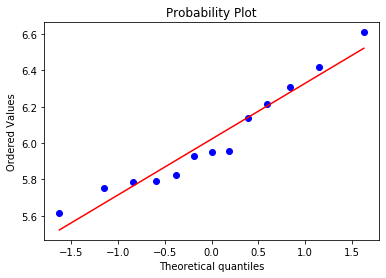

In [51]:
stats.probplot(arrowTime, plot = plt)
plt.show()

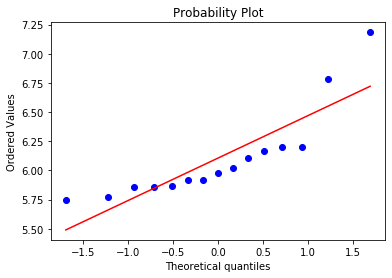

In [52]:
stats.probplot(npcTime, plot = plt)
plt.show()

#### Comparing times to go back

In [53]:
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=-0.6277589596155931, pvalue=0.5356370789128311)

#### Comparing mistakes made

In [35]:
stats.ttest_ind(arrowMistakes, npcMistakes)

Ttest_indResult(statistic=-0.7445134596131818, pvalue=0.4632425841024729)